In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bindingdb-for-dta/Ki_bind.tsv
/kaggle/input/bindingdb-for-dta/IC50_bind.tsv
/kaggle/input/bindingdb-for-dta/Kd_bind.tsv
/kaggle/input/bindingdb-for-dta/EC50_bind.tsv


In [2]:
df = pd.read_csv("/kaggle/input/bindingdb-for-dta/Ki_bind.tsv", sep='\t')
df

,drug_id,target_id,smiles,target_seq,origin_affinity,affinity
0,1,P04183,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIA...,200,6.698970
1,1,P11413,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKK...,1.54e+4,4.812479
2,1,P23919,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAARRGALIVLEGVDRAGKSTQSRKLVEALCAAGHRAELLRFPERS...,180000,3.744727
3,1,P25099,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MPPYISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,>10000,4.999957
4,1,P30543,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MGSSVYITVELAIAVLAILGNVLVCWAVWINSNLQNVTNFFVVSLA...,>10000,4.999957
...,...,...,...,...,...,...
380360,9995,P11511,C[C@]12CCC3C(C[C@@H](O)C4=CCCC[C@]34CO)C1CCC2=O,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,110,6.958607
380361,9996,P11511,C[C@]12CCC3C(CCC4=CCCC[C@]34C)C1CCC2=O,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,6.8,8.167491
380362,9997,P11511,C[C@]12CCC3C(CCC4=CCCC[C@]34CO)C1CCC2=O,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,5.8,8.236572
380363,9998,P11511,C[C@]12CCC3C(CC=C4CCCC[C@]34C)C1CCC2=O,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,120,6.920819


In [3]:
df2 = pd.read_csv("/kaggle/input/bindingdb-for-dta/IC50_bind.tsv", sep='\t')
df2

,drug_id,target_id,smiles,target_seq,origin_affinity,affinity
0,1,P04183,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIA...,16,7.795880
1,1,P06479,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MASYPGHQHASAFDQAARSRGHSNRRTALRPRRQQEATEVRPEQKM...,1000,6.000000
2,1,P11413,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKK...,2.1e+4,4.677781
3,10000,P11511,COc1ccc2cc(oc2c1)C(O)(c1ccc(F)cc1)c1cccnc1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,44,7.356547
4,10001,P11511,COc1ccc2cc(oc2c1)C(O)(c1ccc(Cl)cc1)c1cccnc1,MVLEMLNPIHYNITSIVPEAMPAATMPVLLLTGLFLLVWNYEGTSS...,49,7.309804
...,...,...,...,...,...,...
1034575,99991,P30556,CCc1cc2c(s1)n(Cc1ccc(cc1)-c1ccccc1-c1nc(=O)o[n...,MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...,1.8,8.744727
1034576,99992,P30556,CCc1cc2c(s1)n(Cc1ccc(cc1)-c1ccccc1-c1nc(=O)o[n...,MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...,1.3,8.886057
1034577,99993,P30556,CCc1cc2c(s1)n(Cc1ccc(cc1)-c1ccccc1-c1nc(=O)o[n...,MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...,1.4,8.853872
1034578,99994,P30556,CCc1cc2c(s1)n(Cc1ccc(cc1)-c1ccccc1-c1nc(=O)o[n...,MILNSSTEDGIKRIQDDCPKAGRHNYIFVMIPTLYSIIFVVGIFGN...,1.9,8.721246


In [4]:
df2.columns

Index(['drug_id', 'target_id', 'smiles', 'target_seq', 'origin_affinity',
       'affinity'],
      dtype='object')

In [5]:
def load_file(path, affinity_type):
    df = pd.read_csv(path, sep='\t')
    df = df[['smiles', 'target_seq', 'affinity']].dropna()
    df['AffinityType'] = affinity_type
    return df

df_ki = load_file('/kaggle/input/bindingdb-for-dta/Ki_bind.tsv', 'Ki')
df_ic50 = load_file('/kaggle/input/bindingdb-for-dta/IC50_bind.tsv', 'IC50')
df_kd = load_file('/kaggle/input/bindingdb-for-dta/Kd_bind.tsv', 'Kd')
df_ec50 = load_file('/kaggle/input/bindingdb-for-dta/EC50_bind.tsv', 'EC50')

# Merge them into one
df = pd.concat([df_ki, df_ic50, df_kd, df_ec50], ignore_index=True)
df

,smiles,target_seq,affinity,AffinityType
0,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIA...,6.698970,Ki
1,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKK...,4.812479,Ki
2,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAARRGALIVLEGVDRAGKSTQSRKLVEALCAAGHRAELLRFPERS...,3.744727,Ki
3,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MPPYISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,4.999957,Ki
4,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MGSSVYITVELAIAVLAILGNVLVCWAVWINSNLQNVTNFFVVSLA...,4.999957,Ki
...,...,...,...,...
1635682,CN1CCN(CC1)c1cccc(Nc2nc3c(cccn3n2)-c2ccc(cc2)S...,MDLEGDRNGGAKKKNFFKLNNKSEKDKKEKKPTVSVFSMFRYSNWL...,6.694649,EC50
1635683,Cc1cc(NCCCCO)n2c(nc3ccccc23)c1C#N,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,4.157953,EC50
1635684,CN1C(N(C)c2ccccc2C1=O)c1ccc2OCOc2c1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,4.158053,EC50
1635685,COc1ccc(C2C3C(=O)CC(C)(C)CC3=NC(C)=C2C(=O)N2CC...,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,4.280470,EC50


In [6]:
from sklearn.preprocessing import MinMaxScaler
df = df[df['affinity'] > 0]  # avoid log(0)
df['affinity'] = np.log(df['affinity'])
scaler = MinMaxScaler()
df['affinity'] = scaler.fit_transform(df[['affinity']])

# Rename for consistency with model code
df.rename(columns={'smiles': 'Drug', 'target_seq': 'Target', 'affinity': 'Affinity'}, inplace=True)
df

/tmp/ipykernel_35/2390296033.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['affinity'] = np.log(df['affinity'])
/tmp/ipykernel_35/2390296033.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['affinity'] = scaler.fit_transform(df[['affinity']])
/tmp/ipykernel_35/2390296033.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-ve

,Drug,Target,Affinity,AffinityType
0,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MSCINLPTVLPGSPSKTRGQIQVILGPMFSGKSTELMRRVRRFQIA...,0.884738,Ki
1,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAEQVALSRTQVCGILREELFQGDAFHQSDTHIFIIMGASGDLAKK...,0.840486,Ki
2,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MAARRGALIVLEGVDRAGKSTQSRKLVEALCAAGHRAELLRFPERS...,0.806921,Ki
3,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MPPYISAFQAAYIGIEVLIALVSVPGNVLVIWAVKVNQALRDATFC...,0.845599,Ki
4,Cc1cn([C@H]2C[C@H](O)[C@@H](CO)O2)c(=O)[nH]c1=O,MGSSVYITVELAIAVLAILGNVLVCWAVWINSNLQNVTNFFVVSLA...,0.845599,Ki
...,...,...,...,...
1635682,CN1CCN(CC1)c1cccc(Nc2nc3c(cccn3n2)-c2ccc(cc2)S...,MDLEGDRNGGAKKKNFFKLNNKSEKDKKEKKPTVSVFSMFRYSNWL...,0.884652,EC50
1635683,Cc1cc(NCCCCO)n2c(nc3ccccc23)c1C#N,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0.820926,EC50
1635684,CN1C(N(C)c2ccccc2C1=O)c1ccc2OCOc2c1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0.820929,EC50
1635685,COc1ccc(C2C3C(=O)CC(C)(C)CC3=NC(C)=C2C(=O)N2CC...,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...,0.824811,EC50


/tmp/ipykernel_35/3885303606.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['smiles_len'] = df['Drug'].apply(len)
/tmp/ipykernel_35/3885303606.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['target_len'] = df['Target'].apply(len)


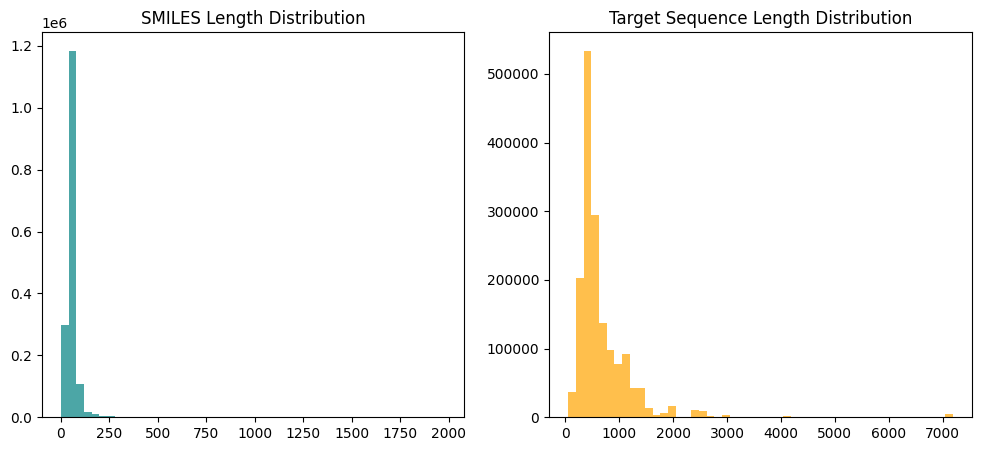

In [7]:
import matplotlib.pyplot as plt

df['smiles_len'] = df['Drug'].apply(len)
df['target_len'] = df['Target'].apply(len)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df['smiles_len'], bins=50, color='teal', alpha=0.7)
plt.title("SMILES Length Distribution")

plt.subplot(1, 2, 2)
plt.hist(df['target_len'], bins=50, color='orange', alpha=0.7)
plt.title("Target Sequence Length Distribution")

plt.show()

In [8]:
max_len_drug = 100
max_len_target = 512

def pad_or_truncate(seq, max_len, pad_char=' '):
    seq = str(seq)
    if len(seq) > max_len:
        return seq[:max_len]
    else:
        return seq + pad_char * (max_len - len(seq))

df['Drug'] = df['Drug'].apply(lambda x: pad_or_truncate(x, max_len_drug))
df['Target'] = df['Target'].apply(lambda x: pad_or_truncate(x, max_len_target))

/tmp/ipykernel_35/631744863.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Drug'] = df['Drug'].apply(lambda x: pad_or_truncate(x, max_len_drug))
/tmp/ipykernel_35/631744863.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Target'] = df['Target'].apply(lambda x: pad_or_truncate(x, max_len_target))


In [14]:
df=df[:100]

In [11]:
!pip install rdkit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.2/35.2 MB 52.7 MB/s eta 0:00:00:00:0100:01


In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
import os
import json
import pickle

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

# 1. Define custom Sampling layer properly
class Sampling(layers.Layer):
    """Reparameterization trick: sample from the latent space."""
    
    def call(self, inputs):
        z_mean, z_log_var = inputs
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        epsilon = tf.random.normal(shape=(batch, dim))
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon


class KLDivergenceLayer(layers.Layer):
    """Layer that computes KL divergence loss for VAE"""
    
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
    
    def call(self, inputs):
        z_mean, z_log_var = inputs
        # Use keras.backend operations instead of tf operations
        kl_loss = -0.5 * keras.backend.sum(
            1 + z_log_var - keras.backend.square(z_mean) - keras.backend.exp(z_log_var),
            axis=-1
        )
        # Add as a loss contribution
        self.add_loss(keras.backend.mean(kl_loss))
        # Pass through z_mean (identity for this layer)
        return z_mean

# 2. Define custom VAE loss layer
class VAELoss(layers.Layer):
    """Custom layer to calculate VAE loss."""
    
    def __init__(self, smiles_max_length, **kwargs):
        super().__init__(**kwargs)
        self.smiles_max_length = smiles_max_length
    
    def call(self, inputs):
        y_true, y_pred, z_mean, z_log_var = inputs
        
        # Reconstruction loss
        reconstruction_loss = tf.keras.losses.categorical_crossentropy(y_true, y_pred) 
        reconstruction_loss = tf.reduce_sum(reconstruction_loss, axis=-1)
        reconstruction_loss *= self.smiles_max_length
        
        # KL divergence
        kl_loss = -0.5 * tf.reduce_sum(
            1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var), 
            axis=-1
        )
        
        # Total loss
        return tf.reduce_mean(reconstruction_loss + kl_loss)

class DrugDiscoveryCVAE:
    def __init__(self, smiles_max_length=120, target_max_length=1000, latent_dim=64):
        """
        Initialize the Conditional VAE model for drug discovery.
        
        Args:
            smiles_max_length: Maximum length of SMILES strings
            target_max_length: Maximum length of target protein sequences
            latent_dim: Dimension of the latent space
        """
        self.smiles_max_length = smiles_max_length
        self.target_max_length = target_max_length
        self.latent_dim = latent_dim
        
        # Placeholders for tokenizers
        self.smiles_tokenizer = None
        self.smiles_vocab_size = None
        self.target_tokenizer = None
        self.target_vocab_size = None
        
        # Placeholders for models
        self.encoder = None
        self.decoder = None
        self.cvae = None
        
        # Placeholder for affinity scaler
        self.affinity_scaler = StandardScaler()
        
        # For visualization and tracking
        self.history = None
        self.models_dir = "models"
        os.makedirs(self.models_dir, exist_ok=True)

    def preprocess_existing_dataframe(self, df):
        """
        Preprocess an existing pandas DataFrame containing drug-target-affinity data.
        
        Args:
            df: Pandas DataFrame with columns: 'Drug' (SMILES), 'Target' (protein sequence), 'Affinity'
            
        Returns:
            Preprocessed data ready for training
        """
        print("Preprocessing existing DataFrame...")
        print(f"DataFrame has {len(df)} samples")
        
        # Create tokenizers for SMILES and target sequences
        self.smiles_tokenizer = Tokenizer(char_level=True)
        self.smiles_tokenizer.fit_on_texts(df['Drug'].values)
        self.smiles_vocab_size = len(self.smiles_tokenizer.word_index) + 1
        print(f"SMILES vocabulary size: {self.smiles_vocab_size}")
        
        self.target_tokenizer = Tokenizer(char_level=True)
        self.target_tokenizer.fit_on_texts(df['Target'].values)
        self.target_vocab_size = len(self.target_tokenizer.word_index) + 1
        print(f"Target vocabulary size: {self.target_vocab_size}")
        
        # Convert sequences to integer indices
        smiles_seqs = self.smiles_tokenizer.texts_to_sequences(df['Drug'].values)
        target_seqs = self.target_tokenizer.texts_to_sequences(df['Target'].values)
        
        # Pad sequences to fixed length
        smiles_data = pad_sequences(smiles_seqs, maxlen=self.smiles_max_length, padding='post')
        target_data = pad_sequences(target_seqs, maxlen=self.target_max_length, padding='post')
        
        # One-hot encode SMILES for output layer
        smiles_one_hot = tf.keras.utils.to_categorical(smiles_data, num_classes=self.smiles_vocab_size)
        
        # Scale affinities
        affinities = df['Affinity'].values.reshape(-1, 1)
        self.affinity_scaler.fit(affinities)
        scaled_affinities = self.affinity_scaler.transform(affinities)
        
        # Split data into training and validation sets
        train_indices, val_indices = train_test_split(
            range(len(df)), test_size=0.2, random_state=42)
        
        train_data = {
            'smiles_data': smiles_data[train_indices],
            'smiles_one_hot': smiles_one_hot[train_indices],
            'target_data': target_data[train_indices],
            'affinities': scaled_affinities[train_indices]
        }
        
        val_data = {
            'smiles_data': smiles_data[val_indices],
            'smiles_one_hot': smiles_one_hot[val_indices],
            'target_data': target_data[val_indices],
            'affinities': scaled_affinities[val_indices]
        }
        
        print(f"Training data: {len(train_data['smiles_data'])} samples")
        print(f"Validation data: {len(val_data['smiles_data'])} samples")
        
        return train_data, val_data
        
    def build_encoder(self):
        # SMILES input
        smiles_input = keras.Input(shape=(self.smiles_max_length,), name='smiles_input')
        
        # Target protein input
        target_input = keras.Input(shape=(self.target_max_length,), name='target_input')
        target_embedding = layers.Embedding(
            input_dim=self.target_vocab_size,
            output_dim=64,
            input_length=self.target_max_length
        )(target_input)
        target_lstm = layers.Bidirectional(layers.LSTM(64))(target_embedding)
        
        # Affinity input
        affinity_input = keras.Input(shape=(1,), name='affinity_input')
        
        # Encode SMILES
        smiles_embedding = layers.Embedding(
            input_dim=self.smiles_vocab_size,
            output_dim=128,
            input_length=self.smiles_max_length
        )(smiles_input)
        
        # Process SMILES with LSTM
        x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(smiles_embedding)
        x = layers.Bidirectional(layers.LSTM(64))(x)
        
        # Concatenate SMILES features with target and affinity
        x = layers.concatenate([x, target_lstm, affinity_input])
        
        # Dense layers
        x = layers.Dense(256, activation='relu')(x)
        x = layers.Dense(128, activation='relu')(x)
        
        # Latent space parameterization
        z_mean = layers.Dense(self.latent_dim, name='z_mean')(x)
        z_log_var = layers.Dense(self.latent_dim, name='z_log_var')(x)
        
        # Use our custom Sampling layer
        z = Sampling()([z_mean, z_log_var])
        
        # Create encoder model
        encoder = keras.Model(
            inputs=[smiles_input, target_input, affinity_input],
            outputs=[z_mean, z_log_var, z],
            name='encoder'
        )
        
        return encoder

    def build_decoder(self):
        """
        Build the decoder portion of the CVAE.
        
        Returns:
            Decoder model
        """
        # Latent space input
        latent_input = keras.Input(shape=(self.latent_dim,), name='latent_input')
        
        # Target protein input
        target_input = keras.Input(shape=(self.target_max_length,), name='target_input')
        target_embedding = layers.Embedding(
            input_dim=self.target_vocab_size,
            output_dim=64,
            input_length=self.target_max_length
        )(target_input)
        target_lstm = layers.Bidirectional(layers.LSTM(64))(target_embedding)
        
        # Affinity input
        affinity_input = keras.Input(shape=(1,), name='affinity_input')
        
        # Concatenate latent vector with conditioning information
        x = layers.concatenate([latent_input, target_lstm, affinity_input])
        
        # Dense layers
        x = layers.Dense(128, activation='relu')(x)
        x = layers.Dense(256, activation='relu')(x)
    
        # Reshape for LSTM input
        x = layers.Dense(self.smiles_max_length * 64, activation='relu')(x)
        x = layers.Reshape((self.smiles_max_length, 64))(x)
        
        # LSTM layers
        x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
        
        # Output layer - predict each character in SMILES string
        smiles_output = layers.TimeDistributed(
            layers.Dense(self.smiles_vocab_size, activation='softmax')
        )(x)
        
        # Create decoder model
        decoder = keras.Model(
            inputs=[latent_input, target_input, affinity_input],
            outputs=smiles_output,
            name='decoder'
        )
        
        print("Decoder model summary:")
        decoder.summary()
        
        return decoder
        
    def build_cvae(self):
        """Build the complete CVAE model with proper Keras layers."""
        # Build encoder and decoder
        self.encoder = self.build_encoder()
        self.decoder = self.build_decoder()
        
        # CVAE inputs
        smiles_input = keras.Input(shape=(self.smiles_max_length,), name='smiles_input')
        target_input = keras.Input(shape=(self.target_max_length,), name='target_input')
        affinity_input = keras.Input(shape=(1,), name='affinity_input')
        
        # Get latent space representation
        z_mean, z_log_var, z = self.encoder([smiles_input, target_input, affinity_input])
        
        # Apply KL divergence (this layer adds the KL loss to the model)
        kl_layer = KLDivergenceLayer()
        kl_layer([z_mean, z_log_var])
        
        # Generate SMILES from latent space
        smiles_output = self.decoder([z, target_input, affinity_input])
        
        # Create CVAE model
        self.cvae = keras.Model(
            inputs=[smiles_input, target_input, affinity_input],
            outputs=smiles_output,
            name='cvae'
        )
        
        # Compile with categorical crossentropy (we already added KL loss via the layer)
        self.cvae.compile(
            optimizer='adam',
            loss=keras.losses.CategoricalCrossentropy()
        )
        
        print("CVAE model built and compiled.")
         
        
        
        
       

    def train(self, train_data, val_data, batch_size=32, epochs=50):
        """Train the CVAE model."""
        if self.cvae is None:
            self.build_cvae()
        
        print(f"Training CVAE for {epochs} epochs with batch size {batch_size}...")
        
        # Callbacks
        callbacks = [
            keras.callbacks.TensorBoard(log_dir='./logs', histogram_freq=1),
            keras.callbacks.ModelCheckpoint(
                filepath=os.path.join(self.models_dir, 'cvae_best.h5'),
                monitor='val_loss',
                save_best_only=True
            )
        ]
    
        # Prepare simplified inputs (we don't need smiles_one_hot as input anymore)
        train_inputs = [
            train_data['smiles_data'],      # Integer encoded SMILES
            train_data['target_data'],      # Target protein data
            train_data['affinities']        # Affinity values
        ]
        
        val_inputs = [
            val_data['smiles_data'],
            val_data['target_data'],
            val_data['affinities']
        ]
        
        # Train the model
        self.history = self.cvae.fit(
            train_inputs,
            train_data['smiles_one_hot'],  # Target is the one-hot SMILES
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(val_inputs, val_data['smiles_one_hot']),
            callbacks=callbacks
        )
        
        # Save models
        self.cvae.save(os.path.join(self.models_dir, 'cvae_final.h5'))
        self.encoder.save(os.path.join(self.models_dir, 'encoder.h5'))
        self.decoder.save(os.path.join(self.models_dir, 'decoder.h5'))
        
        print("Training completed. Models saved.")
        self.plot_training_history()
        
        
        
        
        

    def plot_training_history(self):
        """Plot the training history."""
        if self.history is None:
            print("No training history available.")
            return
        
        plt.figure(figsize=(12, 4))
        
        # Plot training & validation loss
        plt.subplot(1, 1, 1)
        plt.plot(self.history.history['loss'])
        plt.plot(self.history.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('Loss')
        plt.xlabel('Epoch')
        plt.legend(['Train', 'Validation'], loc='upper right')
        
        # Save figure
        plt.savefig(os.path.join(self.models_dir, 'training_history.png'))
        plt.close()
        
        print("Training history plotted and saved.")

    def generate_molecules(self, target_sequence, desired_affinity, n_samples=10):
        """
        Generate new molecules for a given target and desired affinity.
        
        Args:
            target_sequence: Target protein sequence
            desired_affinity: Desired binding affinity
            n_samples: Number of molecules to generate
            
        Returns:
            List of generated SMILES strings
        """
        if self.decoder is None:
            raise ValueError("Decoder model not available. Train or load a model first.")
        
        # Scale affinity
        scaled_affinity = self.affinity_scaler.transform([[desired_affinity]])
        
        # Convert target sequence to input format
        target_seq = self.target_tokenizer.texts_to_sequences([target_sequence])
        padded_target = pad_sequences(target_seq, maxlen=self.target_max_length, padding='post')
        
        # Sample points from latent space
        z_samples = np.random.normal(size=(n_samples, self.latent_dim))
        
        # Prepare conditional inputs
        target_input = np.repeat(padded_target, n_samples, axis=0)
        affinity_input = np.repeat(scaled_affinity, n_samples, axis=0)
        
        # Generate molecules
        generated = self.decoder.predict([z_samples, target_input, affinity_input])
        
        # Convert one-hot back to SMILES strings
        smiles_list = []
        for i in range(n_samples):
            # Get the most likely character at each position
            indices = np.argmax(generated[i], axis=1)
            # Convert indices to characters
            chars = []
            for idx in indices:
                if idx > 0:  # Skip padding (index 0)
                    for char, char_idx in self.smiles_tokenizer.word_index.items():
                        if char_idx == idx:
                            chars.append(char)
            # Join characters to form SMILES
            smiles = ''.join(chars)
            smiles_list.append(smiles)
        
        # Validate SMILES strings
        valid_smiles = []
        for smiles in smiles_list:
            mol = Chem.MolFromSmiles(smiles)
            if mol is not None:
                valid_smiles.append(smiles)
        
        print(f"Generated {len(valid_smiles)} valid molecules out of {n_samples} attempts.")
        return valid_smiles


# Example usage with existing DataFrame
if __name__ == "__main__":
    # Assuming df is your existing DataFrame with columns:
    # 'Drug' (SMILES), 'Target' (protein sequences), 'Affinity'
    
    # Initialize the model
    model = DrugDiscoveryCVAE(
        smiles_max_length=120,
        target_max_length=1000,
        latent_dim=64
    )
    
    # Preprocess the existing DataFrame
    train_data, val_data = model.preprocess_existing_dataframe(df)
    
    # Build and train the model
    model.build_cvae()
    model.train(train_data, val_data, batch_size=32, epochs=50)
    
    # Example: Generate molecules for a target protein
    target_protein = df['Target'].iloc[0]  # Use first target as example
    desired_affinity = 10.0  # nM, adjust as needed
    
    generated_molecules = model.generate_molecules(
        target_protein,
        desired_affinity,
        n_samples=20
    )
    
    print("Generated molecules:")
    for i, smiles in enumerate(generated_molecules):
        print(f"{i+1}. {smiles}")

Preprocessing existing DataFrame...
DataFrame has 100 samples
SMILES vocabulary size: 23
Target vocabulary size: 22
Training data: 80 samples
Validation data: 20 samples


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Decoder model summary:


Model: "decoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ target_input (InputLayer) │ (None, 1000)           │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ embedding_5 (Embedding)   │ (None, 1000, 64)       │          1,408 │ target_input[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ latent_input (InputLayer) │ (None, 64)             │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_8           │ (None, 128)            │         66,048 │ embedding_5[0][0]      │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ affinity_input            │ (None, 1)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_3             │ (None, 193)            │              0 │ latent_input[0][0],    │
│ (Concatenate)             │                        │                │ bidirectional_8[0][0], │
│                           │                        │                │ affinity_input[0][0]   │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_8 (Dense)           │ (None, 128)            │         24,832 │ concatenate_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_9 (Dense)           │ (None, 256)            │         33,024 │ dense_8[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 7680)           │      1,973,760 │ dense_9[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape_1 (Reshape)       │ (None, 120, 64)        │              0 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bidirectional_9           │ (None, 120, 256)       │        197,632 │ reshape_1[0][0]        │
│ (Bidirectional)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ time_distributed_1        │ (None, 120, 23)        │          5,911 │ bidirectional_9[0][0]  │
│ (TimeDistributed)         │                        │                │                        │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 2,302,615 (8.78 MB)

 Trainable params: 2,302,615 (8.78 MB)

 Non-trainable params: 0 (0.00 B)

CVAE model built and compiled.
Training CVAE for 50 epochs with batch size 32...
Epoch 1/50


I0000 00:00:1748752784.029114     101 cuda_dnn.cc:529] Loaded cuDNN version 90300


3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - loss: 3.0935 - val_loss: 2.7727
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 671ms/step - loss: 2.6290 - val_loss: 1.9421
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 661ms/step - loss: 1.8315 - val_loss: 1.6823
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 658ms/step - loss: 1.5542 - val_loss: 1.5191
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 662ms/step - loss: 1.4264 - val_loss: 1.4402
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 653ms/step - loss: 1.3870 - val_loss: 1.3973
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 660ms/step - loss: 1.3238 - val_loss: 1.3846
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 673ms/step - loss: 1.3090 - val_loss: 1.3506
Epoch 9/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 651ms/step - loss: 1.2688 - val_loss: 1.3166
Epoch 10/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 657ms/step - loss: 1.2242 - val_loss: 1.2448
Epoch 11/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 656ms/step - loss: 1.1461 - val_loss: 1.1462
Epoch 12/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 663ms/step - loss: 1.0916 - val_loss: 1.0986
Ep

[04:41:08] SMILES Parse Error: syntax error while parsing: c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)
[04:41:08] SMILES Parse Error: check for mistakes around position 5:
[04:41:08] c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cc
[04:41:08] ~~~~^
[04:41:08] SMILES Parse Error: Failed parsing SMILES 'c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)' for input: 'c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)'
[04:41:08] SMILES Parse Error: syntax error while parsing: c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)
[04:41:08] SMILES Parse Error: check for mistakes around position 5:
[04:41:08] c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cc
[04:41:08] ~~~~^
[04:41:08] SMILES Parse Error: Failed parsing SMILES 'c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)' for input: 'c[c@)c(coc2ccc(cl)cn2ccn(cccocc]1c(ccc(cccccc)cc=)@ccccn(ccccccccc(ccc)c#)'
[04:41:08] SMILES 